## 1.Importing the libraries

In [206]:
# Data Wrangling


import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict


# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns


# Data Preprocessing

import statsmodels.api as sm
from scipy import stats


# Modelling

from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


# tabulating the results

from tabulate import tabulate

# Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')



## 2.Importing the data

In [207]:
# Fetching the dataset

df = pd.read_csv('/Users/kuldip/Desktop/NITK TRANSPORTATION ENGINEERING/Data Analyst Projects/Dataset/insurance.csv')

In [208]:
# looking at the sample data in the dataset

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [209]:
# shape of the dataser

df.shape

(1338, 7)

#### The dataset contains 7 columns and 1338 rows

## 3.Exploratory Data Analysis

#### Here we will perform EDA on the categorical columns of the dataset - Sex,Smoker,Region and the numerical columns of the dataset - Age,BMI, children,charges 

In [210]:
# looking at the datatypes of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [211]:
# changing the datatype of sex,smoker and region from object to category

df.sex = df.sex.astype('category')
df.smoker = df.smoker.astype('category')
df.region = df.region.astype('category')


In [212]:
# looking at the modified datatypes of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [213]:
# checking missing value in the dataset

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### from the above we can see that there are no missing value in the datset


In [214]:
# summary statistics of the numerical columns in the dataset

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [215]:
# Feature Analysis

## Categorical variable - sex

sex_count = df['sex'].value_counts(dropna = False)
sex_count


sex
male      676
female    662
Name: count, dtype: int64

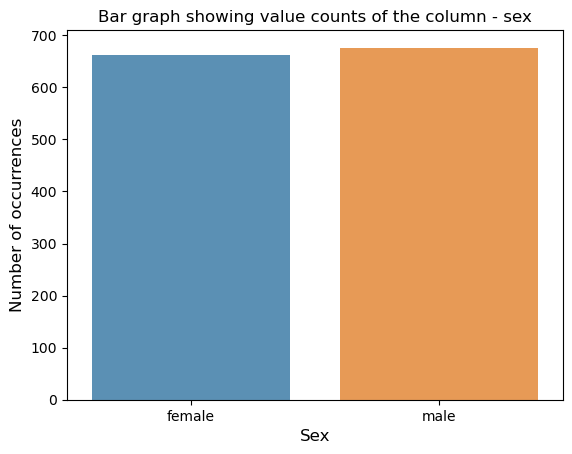

In [216]:
# bar graph showing value counts of the column - sex

sns.barplot(x= sex_count.index,y =sex_count.values,alpha = 0.8)
plt.title('Bar graph showing value counts of the column - sex')
plt.ylabel('Number of occurrences', fontsize =12)
plt.xlabel('Sex',fontsize = 12)
plt.show()


In [217]:
# mean price for each sex

mean_price_sex = df[['sex','charges']].groupby('sex', as_index = False).mean()
mean_price_sex

,sex,charges
0,female,12569.578844
1,male,13956.751178


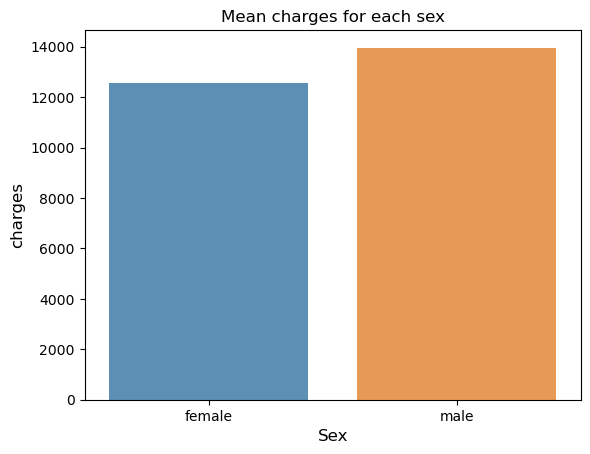

In [218]:
sns.barplot(x = mean_price_sex['sex'],y=mean_price_sex['charges'],alpha = 0.8)
plt.title('Mean charges for each sex')
plt.ylabel('charges',fontsize =12)
plt.xlabel('Sex',fontsize =12)
plt.show()

#### on observing the above plot we can see that mean charges is higher in males as compared to females


In [219]:
# Categorical variable - smoker

smoker_count =df['smoker'].value_counts()
smoker_count

smoker
no     1064
yes     274
Name: count, dtype: int64

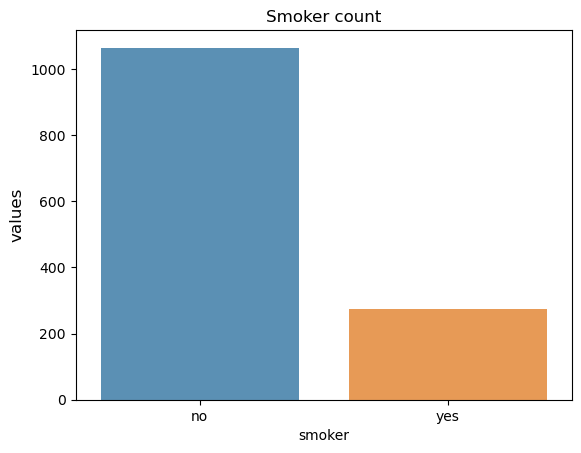

In [220]:
sns.barplot(x= smoker_count.index,y = smoker_count.values,alpha  =0.8)
plt.title('Smoker count')
plt.ylabel('values',fontsize =12)
plt.show()

#### from the plot we can see that most of the records are from non smoker


In [221]:
# mean price for smoker
mean_price_smoker = df[['smoker','charges']].groupby('smoker',as_index =False).mean()
mean_price_smoker

,smoker,charges
0,no,8434.268298
1,yes,32050.231832


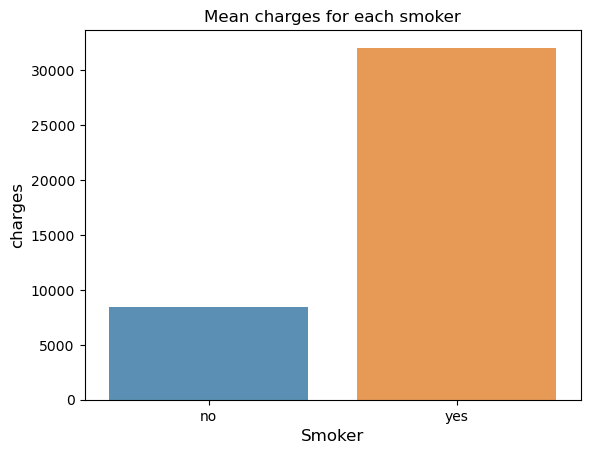

In [222]:
sns.barplot(x = mean_price_smoker['smoker'],y=mean_price_smoker['charges'],alpha = 0.8)
plt.title('Mean charges for each smoker')
plt.ylabel('charges',fontsize =12)
plt.xlabel('Smoker',fontsize =12)
plt.show()

#### From the above graph we can see that mean charges are higher for an individual who smokes than their non- smoking counterparts. This could also be the reason why men pay higher charges than female. this statement can only become true if most of the smoker are male.


Text(0.5, 1.0, 'Mean charges by Sex and Smoker')

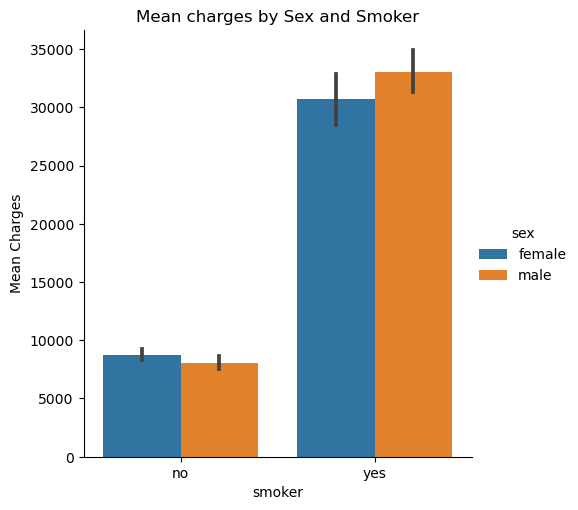

In [223]:
sns.catplot(x ='smoker',y='charges', hue = 'sex',data =df, kind ='bar')
plt.ylabel('Mean Charges')
plt.title('Mean charges by Sex and Smoker')

#### From the above graph, we can see that most of the people who smoke are male, hence they have high charges. Therefore, our statement is true.

In [224]:
# categorical variable - region

region_count = df['region'].value_counts(dropna = False)
region_count

region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64

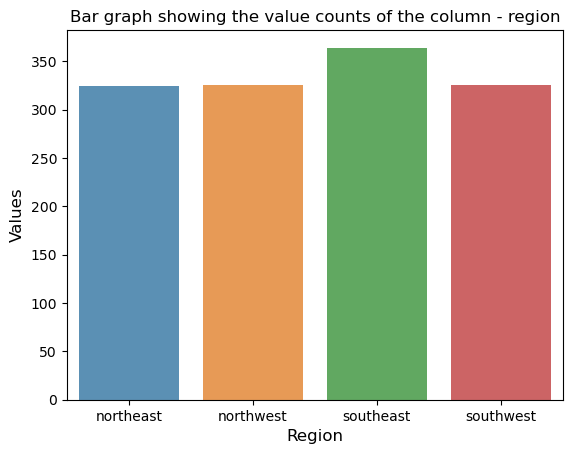

In [225]:
sns.barplot(x=region_count.index,y=region_count.values,alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - region')
plt.xlabel('Region',fontsize =12)
plt.ylabel('Values',fontsize =12)
plt.show()


#### From the above graph, we can see that most of the records in the dataset belong to the South East region.



In [226]:
# Mean price for region

mean_price_region = df[['region','charges']].groupby('region',as_index = False).mean()
mean_price_region

,region,charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


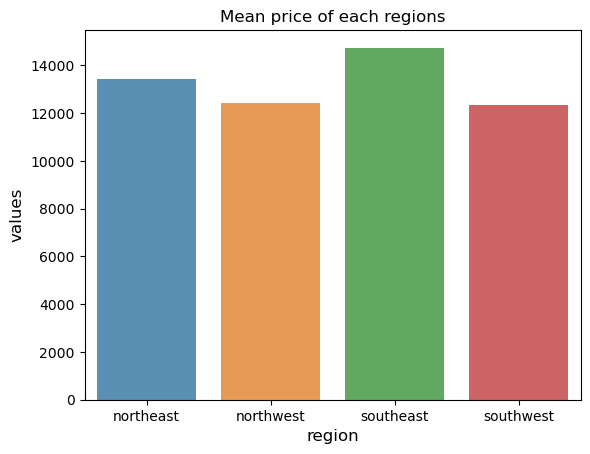

In [227]:
sns.barplot(x=mean_price_region['region'],y=mean_price_region['charges'],alpha = 0.8)
plt.title('Mean price of each regions')
plt.xlabel('region',fontsize= 12)
plt.ylabel('values',fontsize =12)
plt.show()

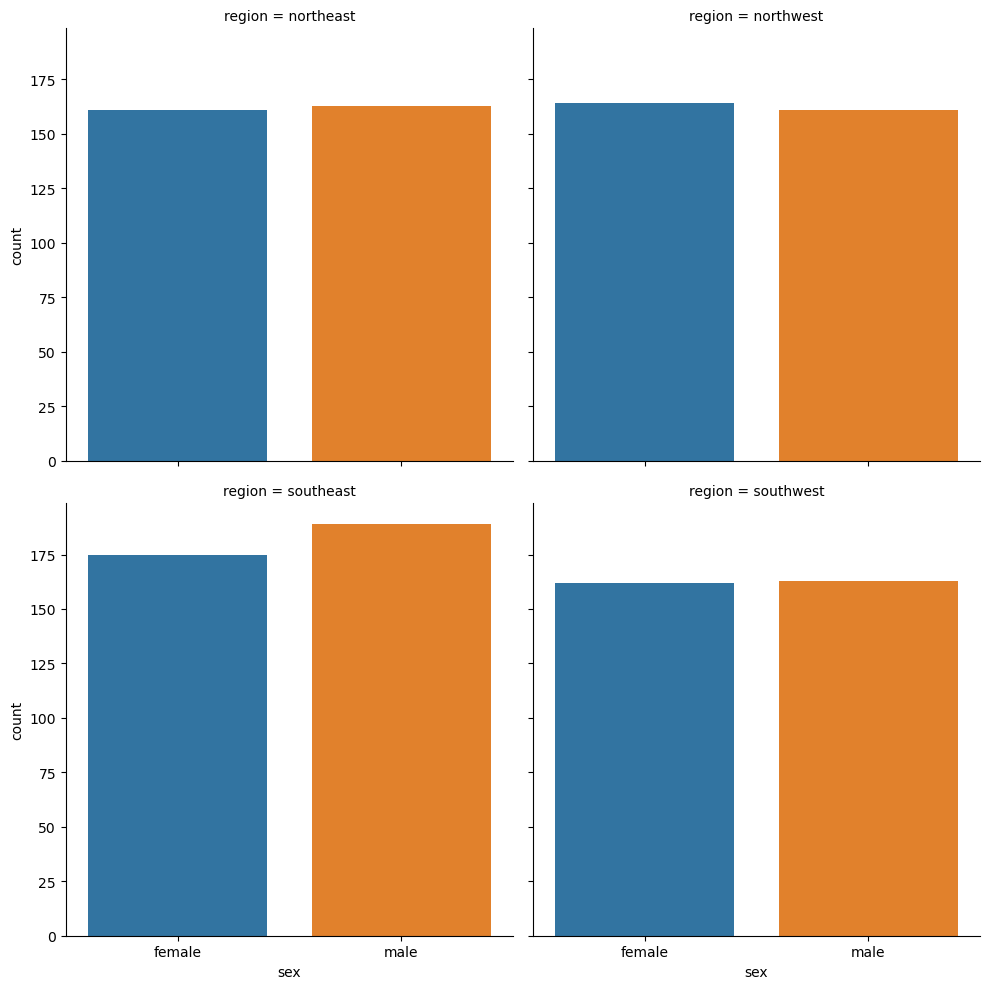

In [228]:
# lets look at the distribution of sex for each region

sns.catplot(x ='sex',col ='region',data= df, kind ='count',col_wrap =2)

#### From the above graph, we can see that for every region the ratio between male and female is same except for Southeast region. Hence, the mean charge is high in the South east region than compared to other regions. We will also plot the above graph using Smoker instead of Sex.

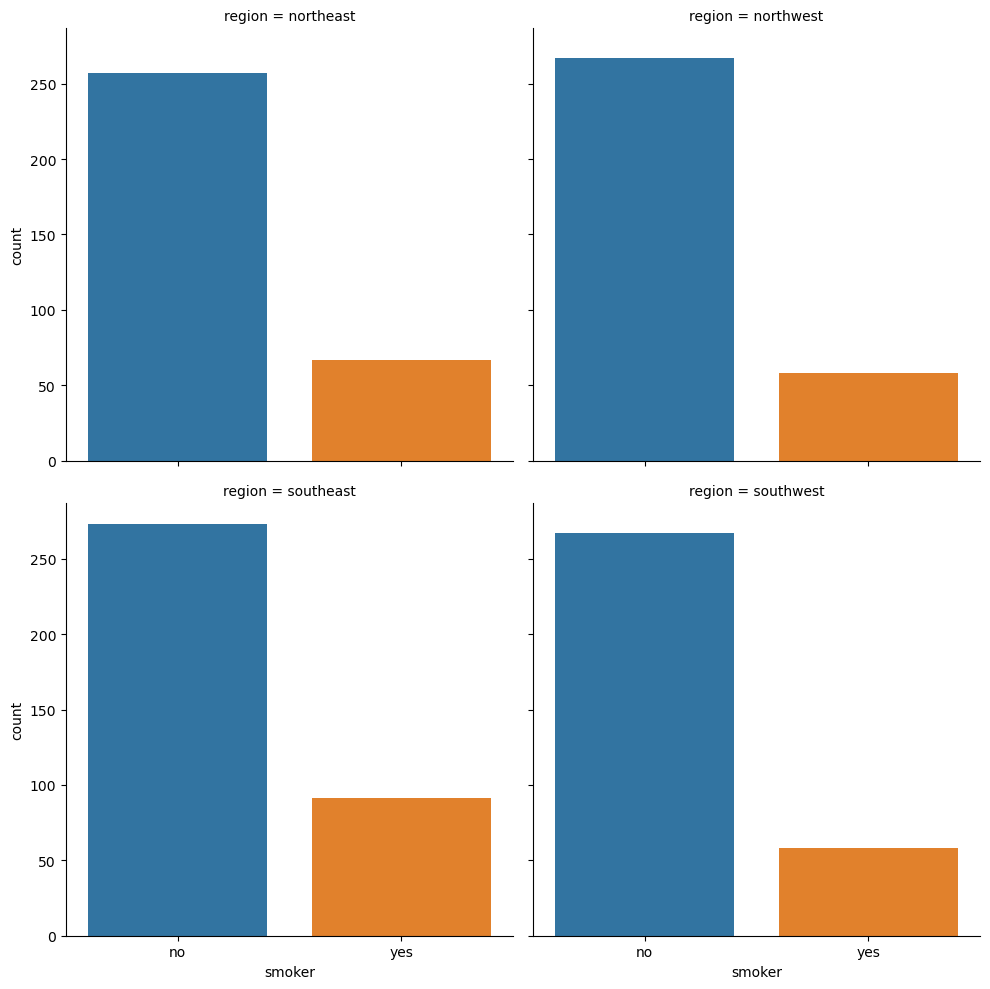

In [229]:
sns.catplot(x= 'smoker', col = 'region', data =df, kind= 'count',col_wrap =2)

#### From the above graph, we can see that there are more people who smoke in Southeast region than compared to other regions. Hence, the higher mean charge in the Southeast region.

Text(0.5, 1.0, 'Distribution of the column age')

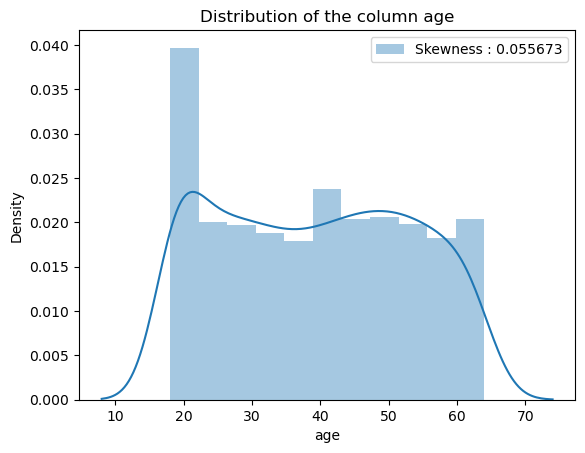

In [230]:
# Numerical variabel - age

sns.distplot(df['age'],label = 'Skewness : %2f'%(df['age'].skew()))
plt.legend(loc ='best')
plt.title('Distribution of the column age')

#### From the above graph, we can see that the distribution has very less skewness.

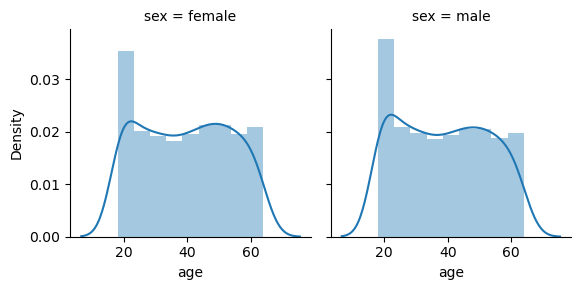

In [231]:
grid = sns.FacetGrid(df,col = 'sex')
grid.map(sns.distplot, 'age')

#### From the above graphs, we can see that the age distribution is similar in both the sex.

Text(0.5, 1.0, 'Age Distribution by sex')

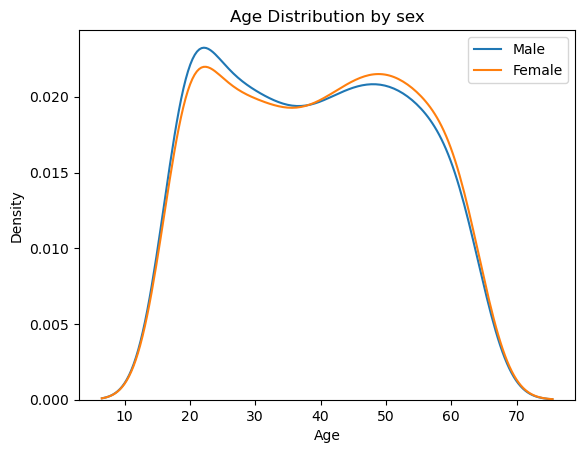

In [232]:
# Merging both graphs into one 

sns.kdeplot(df['age'][df['sex']== 'male'], label = 'Male')
sns.kdeplot(df['age'][df['sex']== 'female'], label = 'Female')
plt.xlabel('Age')
plt.legend()
plt.title('Age Distribution by sex')

#### From the above graph, we can see that for age close to 20 there are more male records in the dataset, whereas in case of age > 40 there are more female records.

<Axes: >

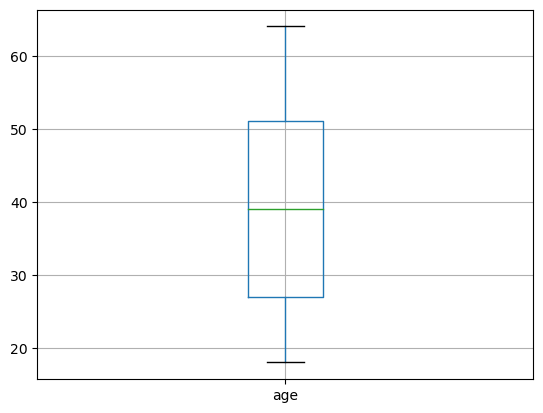

In [233]:
# Plotting a boxplot to check if the column has any outliers 

df.boxplot(column = ['age'])

#### From the above boxplot, we can see that there are no outliers in the column.

Text(0.5, 1.0, 'Distribution of the column bmi')

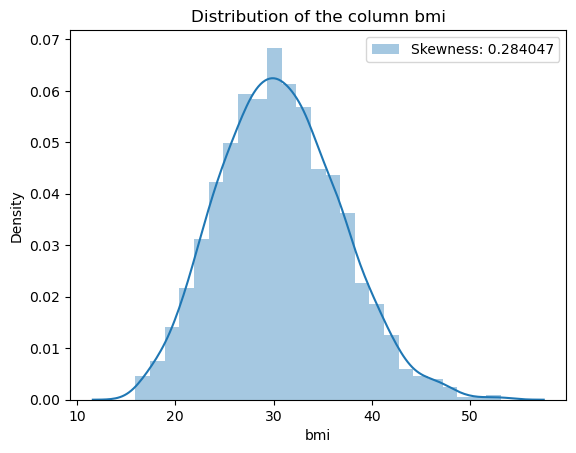

In [234]:
# Numerical variable - bmi

sns.distplot(df['bmi'],label ='Skewness: %2f'%(df['bmi'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column bmi')

#### From the above graph, we can see that the bmi column is normally distributed with a slight tail at the right.

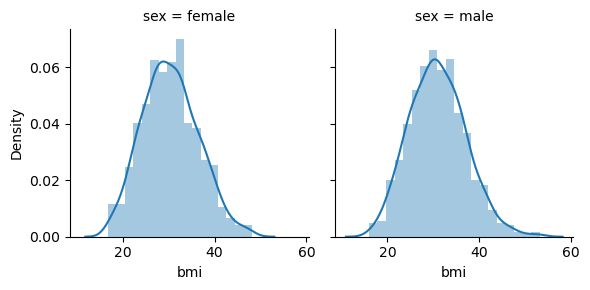

In [235]:
# bmi distribution by sex

grid = sns.FacetGrid(df, col = 'sex')
grid.map(sns.distplot, 'bmi')

#### From the above graph, we can see that both the graphs look similar, except in the case of male where the graph has a slight tail to the right.

Text(0.5, 1.0, 'BMI distribution by Sex')

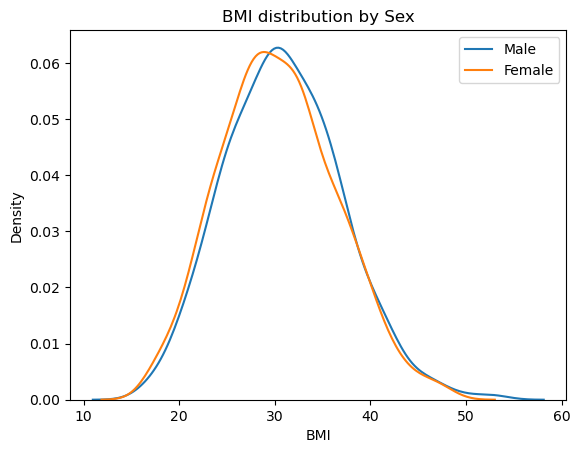

In [236]:
# merging both the above graphs 

sns.kdeplot(df['bmi'][df['sex']== 'male'], label = 'Male')
sns.kdeplot(df['bmi'][df['sex']== 'female'], label = 'Female')
plt.xlabel('BMI')
plt.legend()
plt.title('BMI distribution by Sex')

<Axes: >

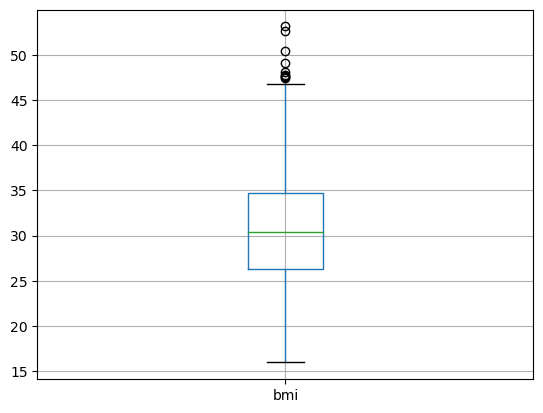

In [237]:
df.boxplot(column = ['bmi'])

#### From the above graph, we can see that there are a few outliers in the column - bmi. We will focus on removing these outliers during the Data Preprocessing phase.



Text(0.5, 1.0, 'Distribution of the column - children')

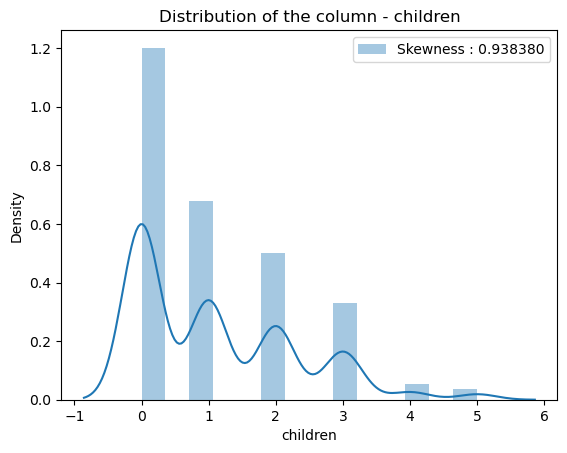

In [238]:
# Numerical column - children

sns.distplot(df['children'],label = 'Skewness : %2f'%(df['children'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - children')

#### From the above graph, we can see that the graph is slightly skewed. Hence, we will remove this skewness during the Data Preprocessing phase.

<Axes: >

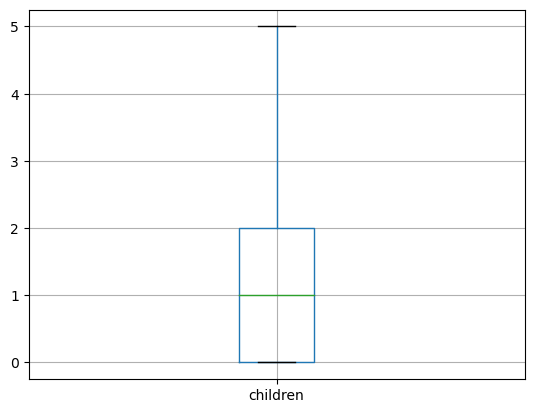

In [239]:
df.boxplot(column= ['children'])

#### From the above boxplot, we can see that there are no outliers in the column.

Text(0.5, 1.0, 'Distribution of the column - charges')

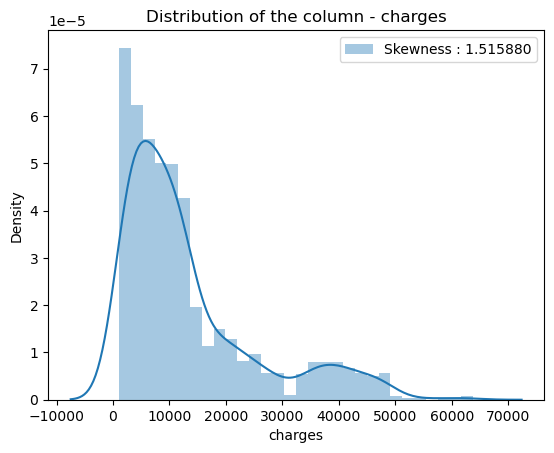

In [240]:
# Numerical Variable Charges

sns.distplot(df['charges'],label ='Skewness : %2f'% (df['charges'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - charges')

<Axes: >

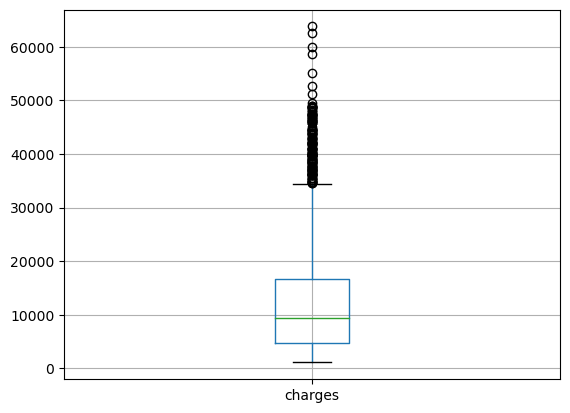

In [241]:
df.boxplot(column = ['charges'])

#### From the above graph, we can see that there are a few outliers in the column - charges. We will focus on removing these outliers during the Data Preprocessing phase.

## 4. Data Preprocessing 

#### Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

#### 1.Drop unnecessary columns
#### 2.Data Trasformation
#### 3.Feature Encoding
#### 4.Feature Selection


In [242]:
# Drop unnecessary columns

# From the dataset, we can see that the column region is redundant, as we can see that it is completely dependent on the columns sex and smoker.

## dropping column region

modified_df = df.copy()
modified_df.drop(['region'],axis =1,inplace =True)

In [243]:
modified_df

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


Text(0.5, 1.0, 'Distribution of the column - children')

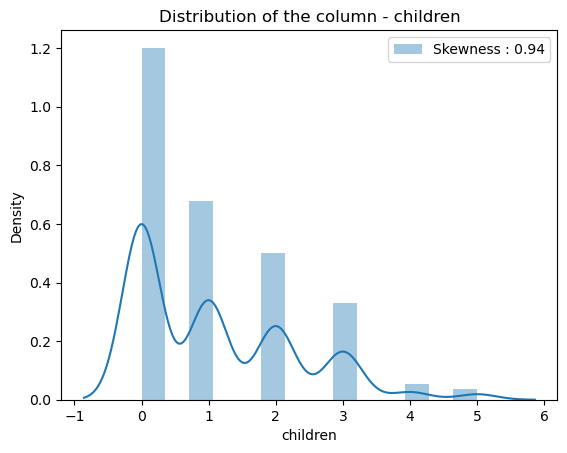

In [244]:
# Data Transformation

# Here, we will focus on transforming the column - children using Box Cox transformation. After that we will scale all the columns using Min Max normalization.

# Box Cox transforming the column children

# understanding the distribution of the column - children


sns.distplot(df['children'],label = 'Skewness : %.2f'%(df['children'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - children')


Text(0.5, 1.0, 'Distribution of the column- children')

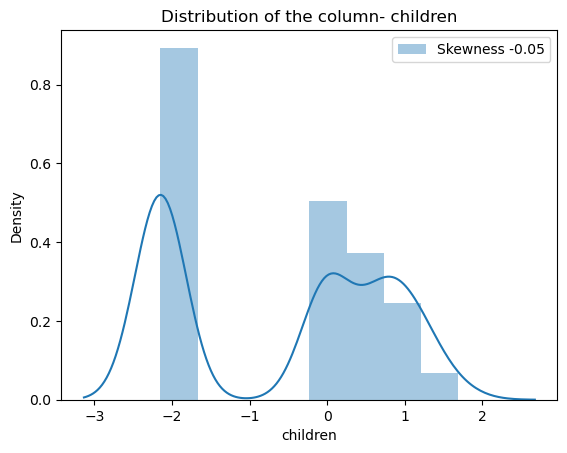

In [245]:
# understanding the distribution of the data box_cox(children)

children_data = [0.1 if value == 0 else value for value in modified_df['children']]

modified_children, _ = stats.boxcox(children_data)
modified_df['children'] = modified_children

sns.distplot(modified_df['children'], label = 'Skewness %.2f'%(modified_df['children'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column- children')

#### From the above graph we ca see that most of the skewness is removed in the column

In [246]:
# Normalizing numerical column

def normalize_columns(dataframe, column):
    data = dataframe[column]
    mini = min(data)
    maxi = max(data)
    
    new_data = []
    for value in data:
        new_data.append((value - mini)/(maxi - mini))
        
    dataframe[column] = new_data

numerical_columns = ['age', 'bmi', 'children']

for each_column in numerical_columns:
    normalize_columns(modified_df, each_column)

In [247]:
modified_df

,age,sex,bmi,children,smoker,charges
0,0.021739,female,0.321227,0.000000,yes,16884.92400
1,0.000000,male,0.479150,0.559508,no,1725.55230
2,0.217391,male,0.458434,0.855475,no,4449.46200
3,0.326087,male,0.181464,0.000000,no,21984.47061
4,0.304348,male,0.347592,0.000000,no,3866.85520
...,...,...,...,...,...,...
1333,0.695652,male,0.403820,0.855475,no,10600.54830
1334,0.000000,female,0.429379,0.000000,no,2205.98080
1335,0.000000,female,0.562012,0.000000,no,1629.83350
1336,0.065217,female,0.264730,0.000000,no,2007.94500


In [248]:
# Feature encoding

# Feature encoding is the process of turning categorical data in a dataset into numerical data. It is essential that we perform feature encoding because most machine learning models can only interpret numerical data and not data in text form.

# Here, we will use One Hot Encoding for the columns - sex, smoker

encoded_df = pd.get_dummies(data = modified_df, columns = ['sex','smoker'])
# Convert binary dummy columns to integer type
encoded_df['sex_female'] = encoded_df['sex_female'].astype(int)
encoded_df['sex_male'] = encoded_df['sex_male'].astype(int)
encoded_df['smoker_no'] = encoded_df['smoker_no'].astype(int)
encoded_df['smoker_yes'] = encoded_df['smoker_yes'].astype(int)


In [249]:
encoded_df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,0.021739,0.321227,0.000000,16884.92400,1,0,0,1
1,0.000000,0.479150,0.559508,1725.55230,0,1,1,0
2,0.217391,0.458434,0.855475,4449.46200,0,1,1,0
3,0.326087,0.181464,0.000000,21984.47061,0,1,1,0
4,0.304348,0.347592,0.000000,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.855475,10600.54830,0,1,1,0
1334,0.000000,0.429379,0.000000,2205.98080,1,0,1,0
1335,0.000000,0.562012,0.000000,1629.83350,1,0,1,0
1336,0.065217,0.264730,0.000000,2007.94500,1,0,1,0


In [250]:
# create the column - Target using charges

target_data = encoded_df['charges']
encoded_df['Target'] = target_data

# dropping the column charges

encoded_df.drop(['charges'],axis = 1, inplace =True)
encoded_df

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,Target
0,0.021739,0.321227,0.000000,1,0,0,1,16884.92400
1,0.000000,0.479150,0.559508,0,1,1,0,1725.55230
2,0.217391,0.458434,0.855475,0,1,1,0,4449.46200
3,0.326087,0.181464,0.000000,0,1,1,0,21984.47061
4,0.304348,0.347592,0.000000,0,1,1,0,3866.85520
...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.855475,0,1,1,0,10600.54830
1334,0.000000,0.429379,0.000000,1,0,1,0,2205.98080
1335,0.000000,0.562012,0.000000,1,0,1,0,1629.83350
1336,0.065217,0.264730,0.000000,1,0,1,0,2007.94500


In [251]:
# Feature Selection

#Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

# plotting correlational matrix for the numerical columns

# creating a filter datatset

filter_df = encoded_df[['age','bmi','children']]
filter_df

,age,bmi,children
0,0.021739,0.321227,0.000000
1,0.000000,0.479150,0.559508
2,0.217391,0.458434,0.855475
3,0.326087,0.181464,0.000000
4,0.304348,0.347592,0.000000
...,...,...,...
1333,0.695652,0.403820,0.855475
1334,0.000000,0.429379,0.000000
1335,0.000000,0.562012,0.000000
1336,0.065217,0.264730,0.000000


Text(0.5, 1.0, 'Correlation Heatmap')

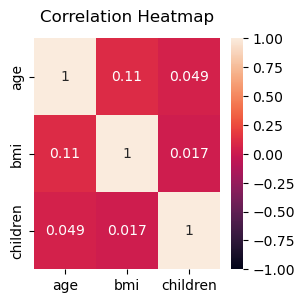

In [252]:
# plotting correlation between them

plt.figure(figsize = (3,3))
heatmap = sns.heatmap(filter_df.corr(),vmin =-1, vmax =1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict ={'fontsize':12},pad =12)

#### from the above correlation matrix, we can see that there are a no strong correlations between the data. We will use VIF to check for multi collinearity.

In [253]:
# Removig the column that cause multicollinearity using VIF

column_names = list(filter_df.columns)

for name in column_names:
    if len(column_names) >=2:
        Y = filter_df.loc[:, filter_df.columns == name]
        X = filter_df.loc[:, filter_df.columns != name]
        
        X = sm.add_constant(X)
        linear_model = sm.OLS(Y ,X)
        results = linear_model.fit()
        r_squared = results.rsquared
        vif_value = round(1/(1- r_squared),2)
        print('Column: {} and VIF: {}'.format(name,vif_value))
        
        if vif_value > 10:
            filter_dataset = filter_dataset.drop([name], axis =1)
            column_names.remove(name)

Column: age and VIF: 1.01
Column: bmi and VIF: 1.01
Column: children and VIF: 1.0


#### From the above data, we can see that there are no columns that cause multicollinearity.

## 5. Modelling 

#### Since Health Insurance Price Prediction is a regression problem, we will need to use regression models, also known as regressors, to train on our model to make predictions. 

#### I have chosen the following regression models for the job:

#### MLR, SVM, Random Forest ,XGBoost 

####  I will fit the models to the training set as outlined above and evaluate their Root Mean Squared Error (RMSE), R-squared at making predictions. Then, we will select the best model based on those values.



In [254]:
# Splitting the dataset into Training and test sets

X = encoded_df.iloc[:, : -1].values
Y = encoded_df.iloc[:, -1].values

In [255]:
X

array([[0.02173913, 0.3212268 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.47914985, 0.55950799, ..., 1.        , 1.        ,
        0.        ],
       [0.2173913 , 0.45843422, 0.85547528, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.56201238, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.26472962, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.93478261, 0.35270379, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [256]:
Y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [257]:
# dividing the dataset into train and test in ratio 80 : 20

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 27 ,shuffle =True)



In [258]:
# fit the model

# In this section, we use various machine learning models to predict the results for our test data (X_test). We will store the model and its corresponding Root Mean Squared Error and R-squared so that we can tabulate them later for choosing the best model.

# Dictionary to store model and its rmse

model_rmse = OrderedDict()


In [259]:
# Dictionary to store model and its r-squared 

model_r2 = OrderedDict()


In [260]:
# Apply MLR

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

LinearRegression()

In [261]:
# predicting the test set results

Y_pred = linear_regressor.predict(X_test)

In [262]:
### calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred),3)
rmse = round(sqrt(mse),3)

r2_value = round(r2_score(Y_test, Y_pred),3)

model_rmse['Multi Linear Regression'] = rmse
model_r2['Multi Linear Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 6308.073
R-squared value of the model is : 0.73


In [263]:
# Applying Support vector Regression

support_vector_regressor = SVR(kernel = 'rbf')
support_vector_regressor.fit(X_train, Y_train)

SVR()

In [264]:
Y_pred = support_vector_regressor.predict(X_test)

In [265]:
### Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Support Vector Regression'] = rmse
model_r2['Support Vector Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 12708.812
R-squared value of the model is : -0.097


In [266]:
# Applying Random Forest Regressor

random_forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=27)

In [267]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [268]:
### Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (100 trees)'] = rmse
model_r2['Random Forest Regression (100 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))


Root Mean Squared Error of the model is : 5568.514
R-squared value of the model is : 0.789


In [269]:
# Applying XGBoost Regressio

xgboost_regressor = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 27)
xgboost_regressor.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [270]:
### Predicting the Test set results

Y_pred = xgboost_regressor.predict(X_test)

In [271]:
### Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['XGBoost Regression'] = rmse
model_r2['XGBoost Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5558.852
R-squared value of the model is : 0.79


In [272]:
# Model Evaluation

# Now we will tabulate all the models along with their RMSE, R-Squared. This data is stored in the model_rmse, model_r2 dictionary. We will use the tabulate package for tabulating the results.

### Looking at the model rmse dictionary

model_rmse

OrderedDict([('Multi Linear Regression', 6308.073),
             ('Support Vector Regression', 12708.812),
             ('Random Forest Regression (100 trees)', 5568.514),
             ('XGBoost Regression', 5558.852)])

In [273]:
### Looking at the model r-squared dictionary

model_r2

OrderedDict([('Multi Linear Regression', 0.73),
             ('Support Vector Regression', -0.097),
             ('Random Forest Regression (100 trees)', 0.789),
             ('XGBoost Regression', 0.79)])

In [274]:
### Tabulating the results

table = []
table.append(['S.No.', 'Classification Model', 'Root Mean Squared Error', 'R-squared'])
count = 1

for model in model_rmse:
    row = [count, model, model_rmse[model], model_r2[model]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤══════════════════════════════════════╤═══════════════════════════╤═════════════╕
│   S.No. │ Classification Model                 │   Root Mean Squared Error │   R-squared │
╞═════════╪══════════════════════════════════════╪═══════════════════════════╪═════════════╡
│       1 │ Multi Linear Regression              │                   6308.07 │       0.73  │
├─────────┼──────────────────────────────────────┼───────────────────────────┼─────────────┤
│       2 │ Support Vector Regression            │                  12708.8  │      -0.097 │
├─────────┼──────────────────────────────────────┼───────────────────────────┼─────────────┤
│       3 │ Random Forest Regression (100 trees) │                   5568.51 │       0.789 │
├─────────┼──────────────────────────────────────┼───────────────────────────┼─────────────┤
│       4 │ XGBoost Regression                   │                   5558.85 │       0.79  │
╘═════════╧══════════════════════════════════════╧════════════════════

#### from the above we can see that XGBoost regression has the least RMSE of 5558.85 and highest R-quared value 0f 0.79
#### Hence, for this problem, we will use the XGBoost regressor to predict the Health Insurance Cost for an individual.